# a. Loading necessary libraries and data sets

In [7]:
# Loading the neccesary libraries into working environment import pandas as pd import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import pandas as pd
import numpy as np


In [8]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold 
from sklearn.linear_model import LogisticRegression 


In [9]:
# Loading the datasets into working environment 
train = pd.read_csv("train.csv") 
test = pd.read_csv("test.csv")



In [10]:
# Getting the total number of rows and columns 
print("Training data shape:",train.shape) 
print("Testing data shape:",test.shape) 

Training data shape: (891, 12)
Testing data shape: (418, 11)


In [11]:
# Printing the first five rows of the train dataset 
train.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# b. Detect missing values numerically

In [12]:
# Detecting the missing values 
def missing_values_table(df):    
    mis_val = df.isnull().sum() 
    mis_val_percent = 100*df.isnull().sum()/len(df)     
    mis_val_table = pd.concat([mis_val,mis_val_percent],axis=1) 
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0:'Missing Values',1:'% of Total values',2:'Data Type'})     
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1]!=0].sort_values('% of Total values',ascending=True).round(5)    
    print("Your selected dataframe has"+str(df.shape[1])+"columns.\n" "there are"+str(mis_val_table_ren_columns.shape[0])+"columns that have missing values. ")
    return mis_val_table_ren_columns  


In [13]:
#

In [14]:
# Missing values in train dataset 
train_missing = missing_values_table(train) 
train_missing 


Your selected dataframe has12columns.
there are3columns that have missing values. 


,Missing Values,% of Total values
Embarked,2,0.22447
Age,177,19.86532
Cabin,687,77.10438


In [15]:
test_missing = missing_values_table(test) 
test_missing 

Your selected dataframe has11columns.
there are3columns that have missing values. 


,Missing Values,% of Total values
Fare,1,0.23923
Age,86,20.57416
Cabin,327,78.22967


# c. Detect missing values visually using missingno library

<AxesSubplot:>

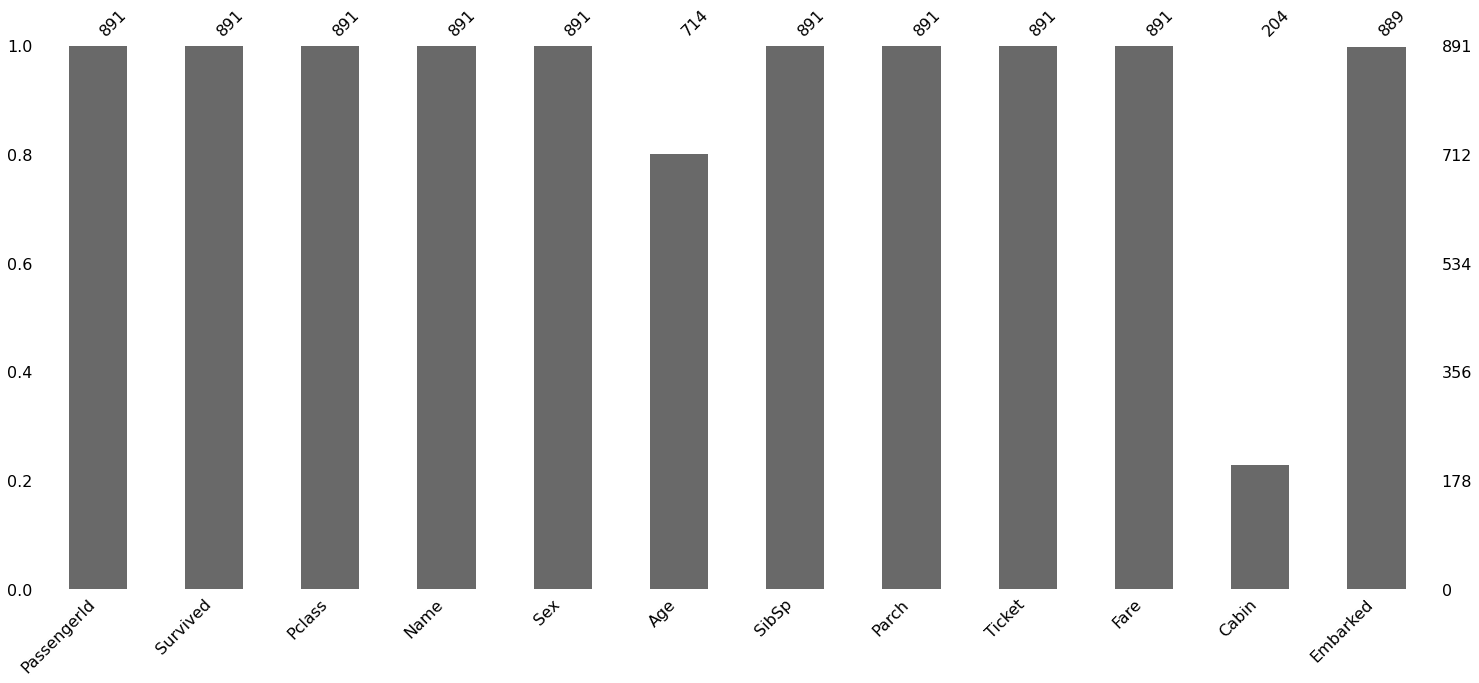

In [64]:
# Plotting bar chart 

import missingno as msno 

msno.bar(train)


<AxesSubplot:>

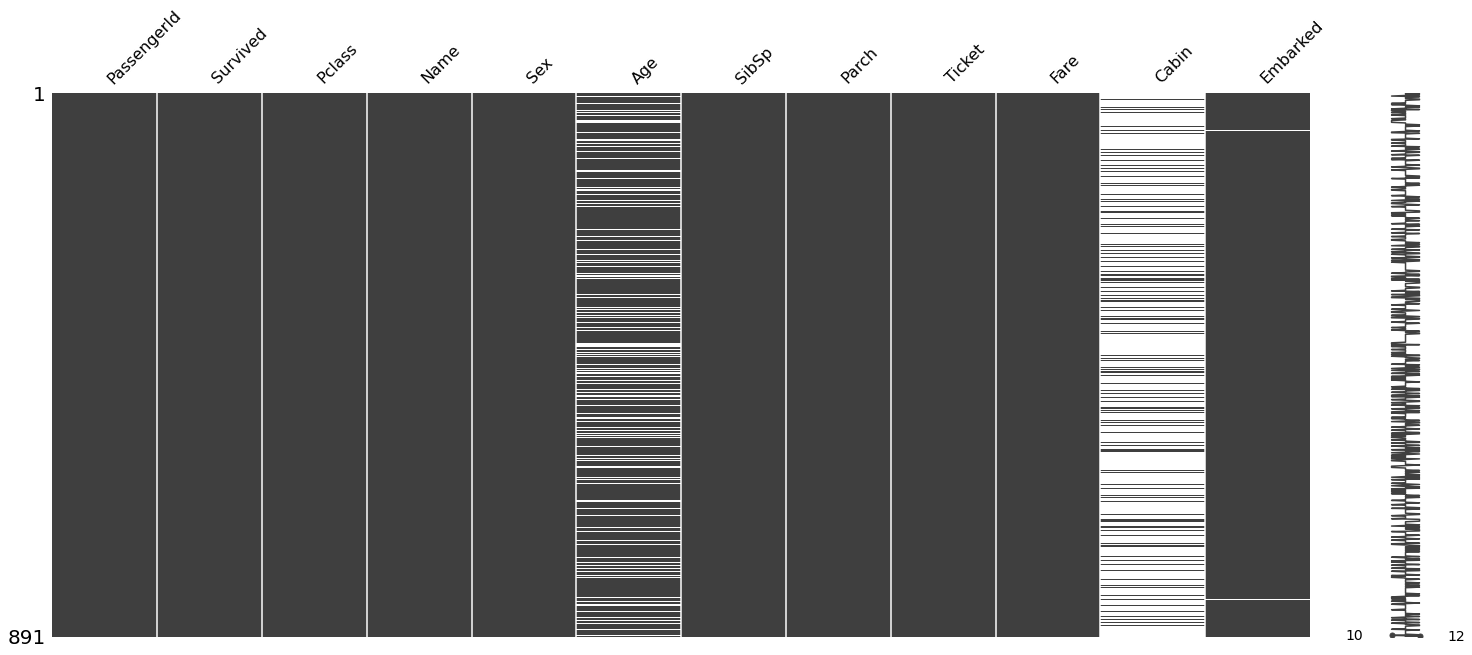

In [65]:
# Visualizing the locations of missing values
msno.matrix(train)

<AxesSubplot:>

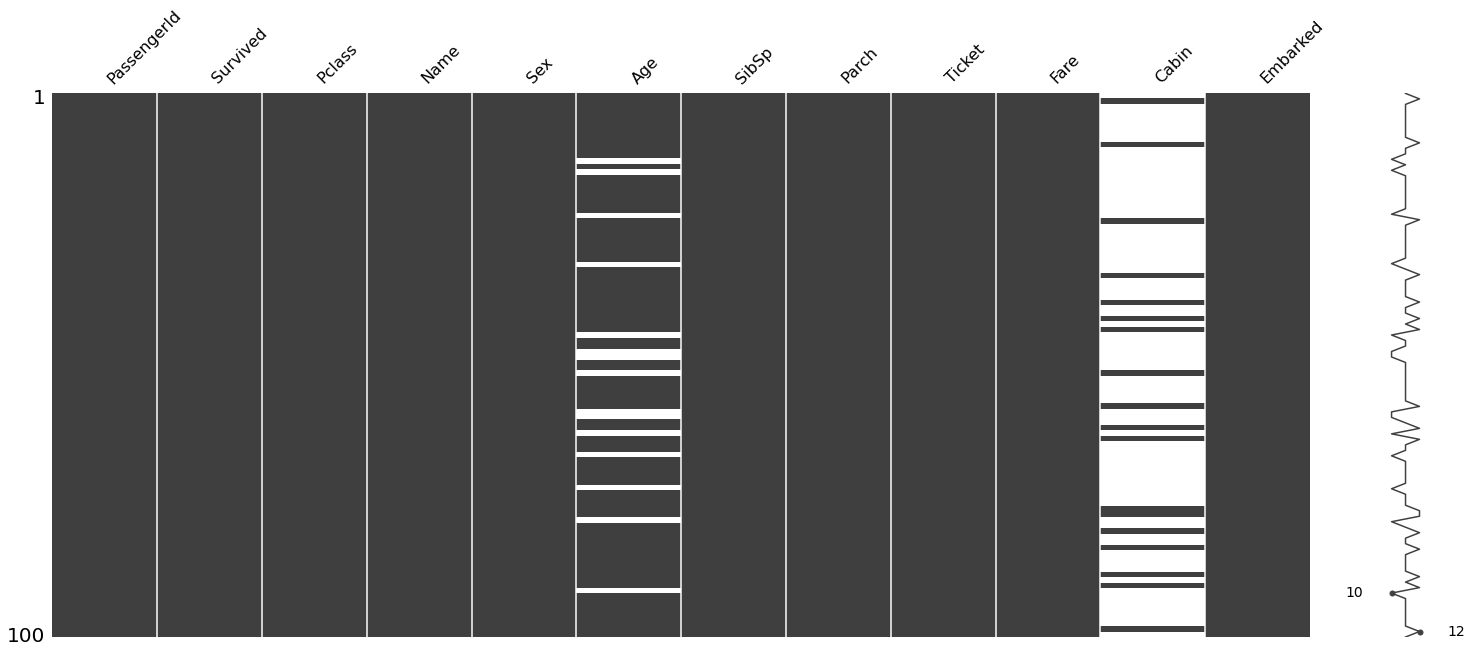

In [66]:
# Taking only the first 100 rows
msno.matrix(train.sample(100))


# d. Find reasons for missing values using matrix plot, heap map and dendrogram

<AxesSubplot:>

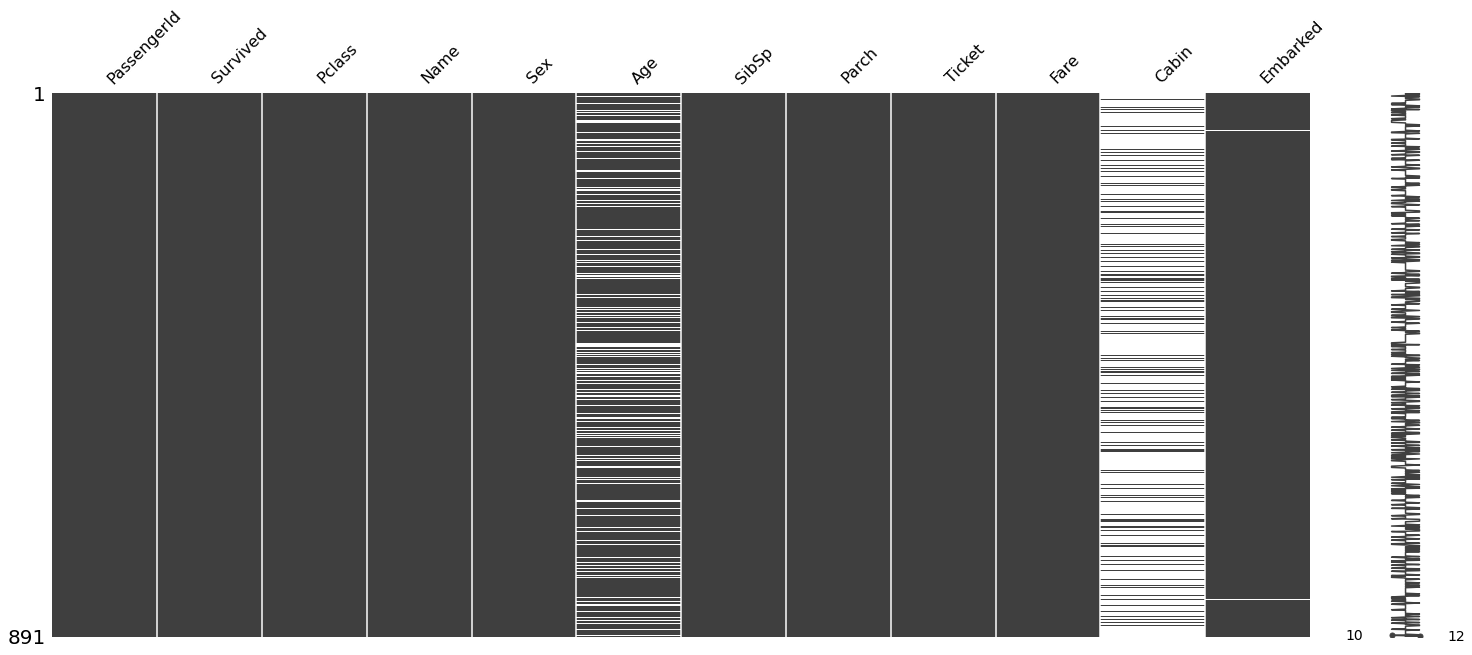

In [67]:
# Use matrix plot
msno.matrix(train)

<AxesSubplot:>

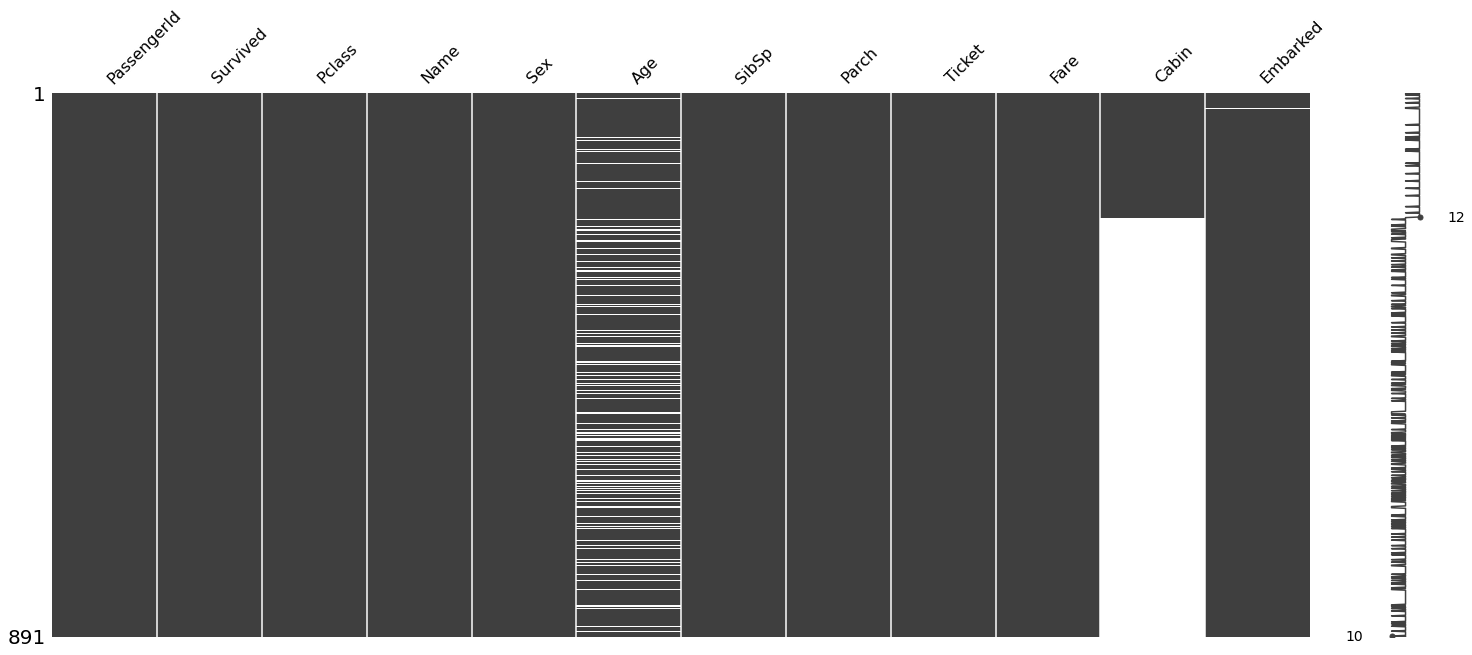

In [68]:
# Sorted by 'Age' 
sorted = train.sort_values('Cabin')
msno.matrix(sorted)


<AxesSubplot:>

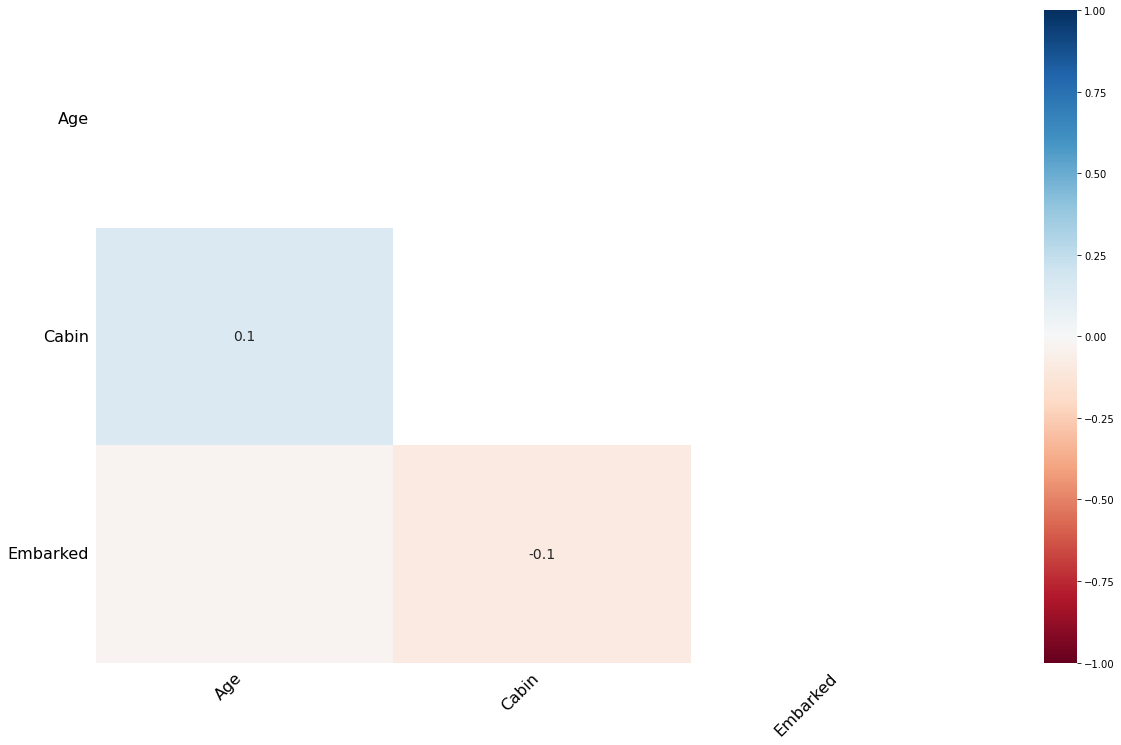

In [69]:

# Finding reason for missing data using heatmap
msno.heatmap(train)

<AxesSubplot:>

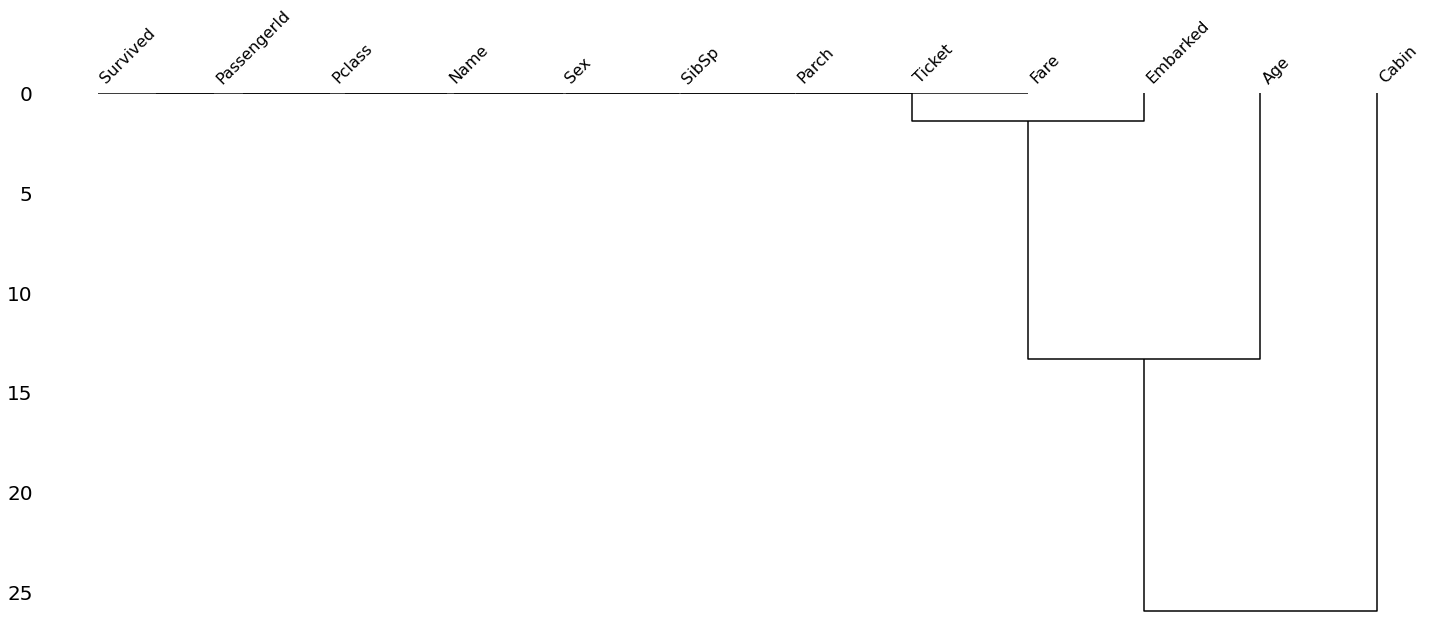

In [70]:
# Finding reasons for missing data using dendrogram
msno.dendrogram(train)


# e. Treat missing values (deletions, imputing for non time series data,imputing for (Time series data)


In [71]:
# Get total number of missing values
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
# pairwise deletion
train_1= train.copy()
train_1.mean()


C:\Users\GPT BGK\AppData\Local\Temp\ipykernel_7204\2434223019.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_1.mean()


PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [77]:
# Dropping the rows with missing values
train_1.dropna(subset=['Age'],inplace = True)
train_1['Age'].isnull().sum()

0

In [17]:
train_1 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [18]:

# Imputing by constant
from sklearn.impute import SimpleImputer
e = train.copy()
mean_imputer = SimpleImputer(strategy='constant')

e.iloc[:,:] = mean_imputer.fit_transform(e)
e.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [32]:
# Imputing by most frequent value
from sklearn.impute import SimpleImputer
train_most_frequent = train.copy()
mean_imputer = SimpleImputer(strategy='most_frequent')
train_most_frequent.iloc[:,:] = mean_imputer.fit_transform(train_most_frequent)
train_most_frequent.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [33]:
city_day = pd.read_csv("city_day.csv")
city_day1 = city_day.copy(deep=True)
city_day.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [34]:
# Missing values
city_day_missing = missing_values_table(city_day)
city_day_missing


Your selected dataframe has16columns.
there are14columns that have missing values. 


,Missing Values,% of Total values
Xylene,18109,61.0
PM10,11140,38.0
NH3,10328,35.0
Toluene,8041,27.0
Benzene,5623,19.0
AQI,4681,16.0
AQI_Bucket,4681,16.0
PM2.5,4598,16.0
NOx,4185,14.0
O3,4022,14.0


In [35]:
# Imputing Xylene value
city_day['Xylene'][50:64]


50     7.48
51    15.44
52     8.47
53    28.46
54     6.05
55     0.81
56      NaN
57      NaN
58      NaN
59     1.32
60     0.22
61     2.25
62     1.55
63     4.13
Name: Xylene, dtype: float64

In [36]:
# Imputing by ffill
city_day.fillna(method= 'ffill',inplace=True)
city_day['Xylene'][50:65]

50     7.48
51    15.44
52     8.47
53    28.46
54     6.05
55     0.81
56     0.81
57     0.81
58     0.81
59     1.32
60     0.22
61     2.25
62     1.55
63     4.13
64     4.13
Name: Xylene, dtype: float64

In [37]:
# Imputing using bfill
city_day['AQI'][20:30]

20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28    209.0
29    328.0
Name: AQI, dtype: float64

In [38]:
city_day.fillna(method='bfill',inplace=True)
city_day['AQI'][20:30]


20    209.0
21    209.0
22    209.0
23    209.0
24    209.0
25    209.0
26    209.0
27    209.0
28    209.0
29    328.0
Name: AQI, dtype: float64